In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
a=pd.read_csv(r'C:\Users\user\Desktop\beer-servings.csv',index_col='Unnamed: 0')

In [3]:
a

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0.0,0.0,0.0,0.0,Asia
1,Albania,89.0,132.0,54.0,4.9,Europe
2,Algeria,25.0,0.0,14.0,0.7,Africa
3,Andorra,245.0,138.0,312.0,12.4,Europe
4,Angola,217.0,57.0,45.0,5.9,Africa
...,...,...,...,...,...,...
188,Venezuela,NaN,100.0,3.0,7.7,South America
189,Vietnam,111.0,2.0,1.0,2.0,Asia
190,Yemen,6.0,0.0,0.0,0.1,Asia
191,Zambia,32.0,19.0,4.0,2.5,Africa


In [4]:
a.head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0.0,0.0,0.0,0.0,Asia
1,Albania,89.0,132.0,54.0,4.9,Europe
2,Algeria,25.0,0.0,14.0,0.7,Africa
3,Andorra,245.0,138.0,312.0,12.4,Europe
4,Angola,217.0,57.0,45.0,5.9,Africa


In [5]:
a.shape

(193, 6)

In [6]:
a.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 193 entries, 0 to 192
Data columns (total 6 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   country                       193 non-null    object 
 1   beer_servings                 185 non-null    float64
 2   spirit_servings               185 non-null    float64
 3   wine_servings                 187 non-null    float64
 4   total_litres_of_pure_alcohol  192 non-null    float64
 5   continent                     193 non-null    object 
dtypes: float64(4), object(2)
memory usage: 10.6+ KB


In [7]:
a.isnull().sum()

country                         0
beer_servings                   8
spirit_servings                 8
wine_servings                   6
total_litres_of_pure_alcohol    1
continent                       0
dtype: int64

In [8]:
a.dtypes

country                          object
beer_servings                   float64
spirit_servings                 float64
wine_servings                   float64
total_litres_of_pure_alcohol    float64
continent                        object
dtype: object

In [9]:
a.columns

Index(['country', 'beer_servings', 'spirit_servings', 'wine_servings',
       'total_litres_of_pure_alcohol', 'continent'],
      dtype='object')

In [10]:
for i in ['beer_servings', 'spirit_servings',
       'wine_servings', 'total_litres_of_pure_alcohol']:
    a[i]=a[i].fillna(a[i].median())

In [11]:
a.isnull().sum()

country                         0
beer_servings                   0
spirit_servings                 0
wine_servings                   0
total_litres_of_pure_alcohol    0
continent                       0
dtype: int64

In [12]:
a.groupby('country')['beer_servings'].mean()

country
Afghanistan      0.0
Albania         89.0
Algeria         25.0
Andorra        245.0
Angola         217.0
               ...  
Venezuela       76.0
Vietnam        111.0
Yemen            6.0
Zambia          32.0
Zimbabwe        64.0
Name: beer_servings, Length: 193, dtype: float64

In [13]:
a.country.nunique()

193

In [14]:
a.drop('country',axis=1,inplace=True)

In [15]:
a.head()

,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,0.0,0.0,0.0,0.0,Asia
1,89.0,132.0,54.0,4.9,Europe
2,25.0,0.0,14.0,0.7,Africa
3,245.0,138.0,312.0,12.4,Europe
4,217.0,57.0,45.0,5.9,Africa


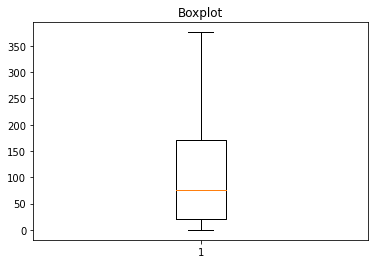

In [16]:
plt.boxplot(a['beer_servings'])
plt.title('Boxplot')
plt.show()

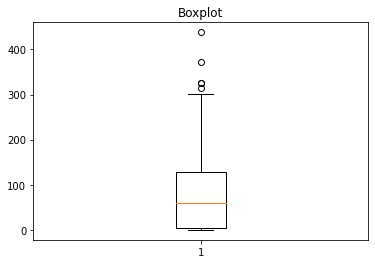

In [17]:
plt.boxplot(a['spirit_servings'])
plt.title('Boxplot')
plt.show()

In [18]:
q1=np.percentile(a['spirit_servings'],25,interpolation='midpoint')
q2=np.percentile(a['spirit_servings'],50,interpolation='midpoint')
q3=np.percentile(a['spirit_servings'],75,interpolation='midpoint')
print(q1,q2,q3)

5.0 60.0 128.0


In [19]:
iqr=q3-q1
lower=q1-1.5*iqr
upper=q3+1.5*iqr
print(iqr)
print(lower)
print(upper)

123.0
-179.5
312.5


In [20]:
outlier=[]
for i in a['spirit_servings']:
    if((i>upper) or (i<lower)):
        outlier.append(i)

In [21]:
outlier

[373.0, 438.0, 326.0, 326.0, 315.0]

In [22]:
ind=a['spirit_servings']>upper
a.loc[ind].index

Int64Index([15, 68, 73, 141, 144], dtype='int64')

In [23]:
a.drop([15, 68, 73, 141, 144],inplace=True)

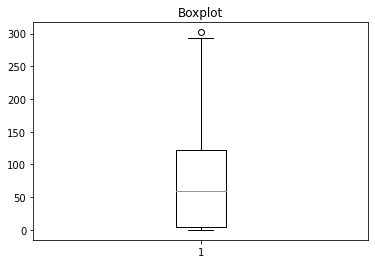

In [24]:
plt.boxplot(a['spirit_servings'])
plt.title('Boxplot')
plt.show()

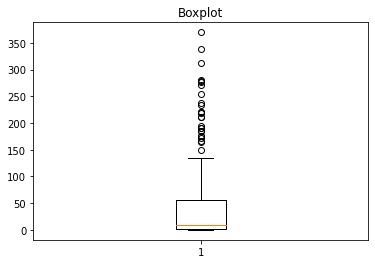

In [25]:
plt.boxplot(a['wine_servings'])
plt.title('Boxplot')
plt.show()

In [26]:
q1=np.percentile(a['wine_servings'],25,interpolation='midpoint')
q2=np.percentile(a['wine_servings'],50,interpolation='midpoint')
q3=np.percentile(a['wine_servings'],75,interpolation='midpoint')
print(q1,q2,q3)

1.0 9.0 57.5


In [27]:
iqr=q3-q1
lower=q1-1.5*iqr
upper=q3+1.5*iqr
print(iqr)
print(lower)
print(upper)

56.5
-83.75
142.25


In [28]:
outlier=[]
for i in a['wine_servings']:
    if((i>upper) or (i<lower)):
        outlier.append(i)

In [29]:
outlier

[312.0,
 221.0,
 212.0,
 191.0,
 212.0,
 172.0,
 254.0,
 278.0,
 233.0,
 370.0,
 149.0,
 175.0,
 218.0,
 185.0,
 165.0,
 237.0,
 271.0,
 190.0,
 175.0,
 339.0,
 167.0,
 276.0,
 186.0,
 280.0,
 195.0,
 220.0]

In [30]:
ind=a['wine_servings']>upper
a.loc[ind].index

Int64Index([  3,   6,   8,   9,  16,  35,  42,  48,  55,  61,  64,  65,  67,
             75,  81,  83,  99, 120, 121, 136, 140, 156, 165, 166, 182, 185],
           dtype='int64')

In [31]:
a.drop([3,   6,   8,   9,  16,  35,  42,  48,  55,  64,  65,  67,  81,
             83,  99, 120, 121, 136, 140, 156, 165, 166, 182, 185],inplace=True)

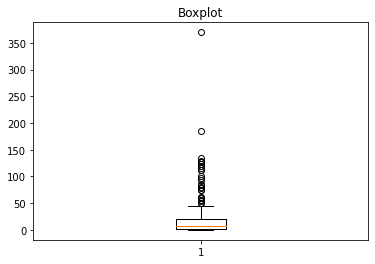

In [32]:
plt.boxplot(a['wine_servings'])
plt.title('Boxplot')
plt.show()

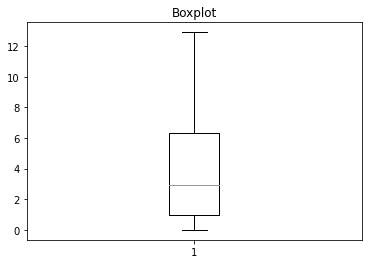

In [33]:
plt.boxplot(a['total_litres_of_pure_alcohol'])
plt.title('Boxplot')
plt.show()

In [34]:
a.shape

(164, 5)

In [35]:
a.continent.nunique()

6

In [36]:
a=pd.get_dummies(a)

In [37]:
a.head()

,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent_Africa,continent_Asia,continent_Europe,continent_North America,continent_Oceania,continent_South America
0,0.0,0.0,0.0,0.0,0,1,0,0,0,0
1,89.0,132.0,54.0,4.9,0,0,1,0,0,0
2,25.0,0.0,14.0,0.7,1,0,0,0,0,0
4,217.0,57.0,45.0,5.9,1,0,0,0,0,0
5,102.0,128.0,45.0,4.9,0,0,0,1,0,0


In [38]:
a.columns

Index(['beer_servings', 'spirit_servings', 'wine_servings',
       'total_litres_of_pure_alcohol', 'continent_Africa', 'continent_Asia',
       'continent_Europe', 'continent_North America', 'continent_Oceania',
       'continent_South America'],
      dtype='object')

<AxesSubplot:>

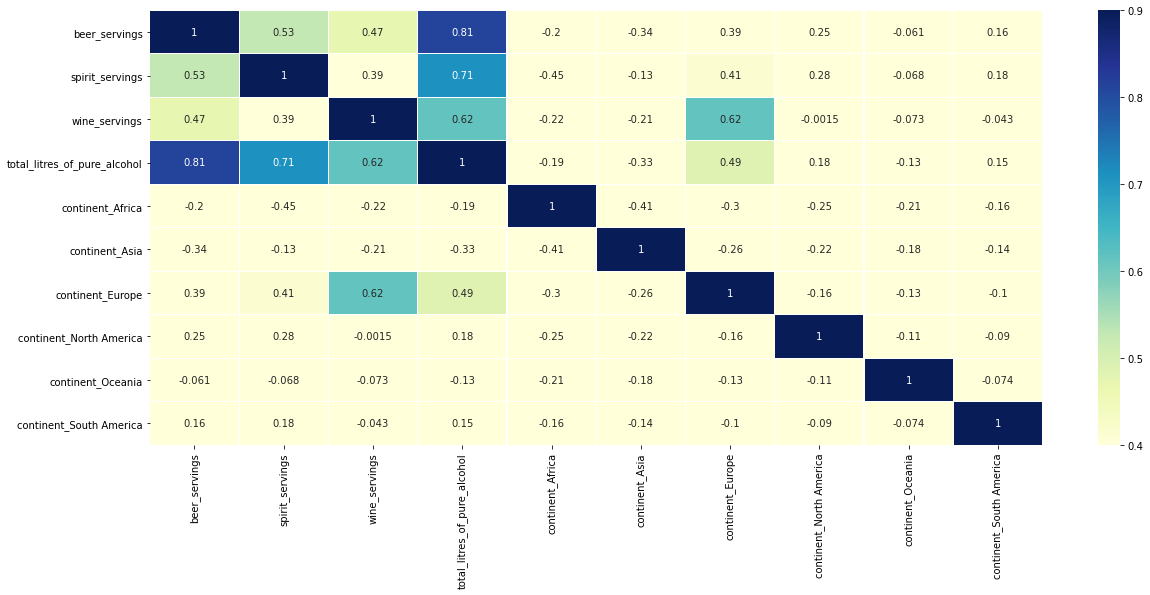

In [39]:
corrmatrix = a.corr()
plt.subplots(figsize=(20,8))
sns.heatmap(corrmatrix,vmin=0.4, vmax=0.9, annot=True, linewidths=0.2, cmap='YlGnBu')

In [40]:
y=a['total_litres_of_pure_alcohol']
X=a.drop(['total_litres_of_pure_alcohol'],axis=1)

In [41]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,y,random_state=42,test_size=0.2)
from sklearn import linear_model
lr=linear_model.LinearRegression()
model=lr.fit(x_train,y_train)
prediction=model.predict(x_test)
from sklearn.metrics import mean_squared_error
print('MSE IS:', mean_squared_error(y_test,prediction))

MSE IS: 1.8690402609277896


In [42]:
from sklearn.metrics import r2_score
print('R squared value is :', r2_score(y_test,prediction))

R squared value is : 0.866922037979849


In [43]:
X.describe()

,beer_servings,spirit_servings,wine_servings,continent_Africa,continent_Asia,continent_Europe,continent_North America,continent_Oceania,continent_South America
count,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000
mean,87.737805,73.591463,23.731707,0.317073,0.262195,0.158537,0.121951,0.085366,0.054878
std,92.171543,79.834323,44.746607,0.466761,0.441175,0.366362,0.328232,0.280281,0.228440
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,17.750000,3.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,56.000000,45.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,131.000000,128.750000,20.250000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,376.000000,302.000000,370.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [44]:
type(X)

pandas.core.frame.DataFrame

In [45]:
from sklearn import preprocessing
standards=preprocessing.StandardScaler()
X=standards.fit_transform(X)

In [46]:
X.describe()

AttributeError: 'numpy.ndarray' object has no attribute 'describe'

In [48]:
X=pd.DataFrame(X)
X.describe()

,0,1,2,3,4,5,6,7,8
count,1.640000e+02,1.640000e+02,1.640000e+02,1.640000e+02,1.640000e+02,1.640000e+02,1.640000e+02,1.640000e+02,1.640000e+02
mean,9.477514e-18,-5.957294e-17,-1.421627e-17,-4.061792e-17,-7.446618e-17,6.092687e-18,-5.483419e-17,2.680782e-16,-7.141983e-17
std,1.003063e+00,1.003063e+00,1.003063e+00,1.003063e+00,1.003063e+00,1.003063e+00,1.003063e+00,1.003063e+00,1.003063e+00
min,-9.548123e-01,-9.246256e-01,-5.319821e-01,-6.813851e-01,-5.961308e-01,-4.340574e-01,-3.726780e-01,-3.055050e-01,-2.409658e-01
25%,-7.616468e-01,-8.869327e-01,-5.095656e-01,-6.813851e-01,-5.961308e-01,-4.340574e-01,-3.726780e-01,-3.055050e-01,-2.409658e-01
50%,-3.453887e-01,-3.592319e-01,-3.750665e-01,-6.813851e-01,-5.961308e-01,-4.340574e-01,-3.726780e-01,-3.055050e-01,-2.409658e-01
75%,4.708036e-01,6.930287e-01,-7.804773e-02,1.467599e+00,1.677484e+00,-4.340574e-01,-3.726780e-01,-3.055050e-01,-2.409658e-01
max,3.137032e+00,2.869795e+00,7.762127e+00,1.467599e+00,1.677484e+00,2.303843e+00,2.683282e+00,3.273268e+00,4.149967e+00


In [49]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,y,random_state=42,test_size=0.2)
from sklearn import linear_model
lr=linear_model.LinearRegression()
model=lr.fit(x_train,y_train)
prediction=model.predict(x_test)
from sklearn.metrics import mean_squared_error
print('MSE IS:', mean_squared_error(y_test,prediction))

MSE IS: 1.8690402609277872


In [50]:
from sklearn.metrics import r2_score
print('R squared value is :', r2_score(y_test,prediction))

R squared value is : 0.8669220379798492


In [51]:
X=a.drop(['total_litres_of_pure_alcohol'],axis=1)

In [52]:
X.describe()

,beer_servings,spirit_servings,wine_servings,continent_Africa,continent_Asia,continent_Europe,continent_North America,continent_Oceania,continent_South America
count,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000
mean,87.737805,73.591463,23.731707,0.317073,0.262195,0.158537,0.121951,0.085366,0.054878
std,92.171543,79.834323,44.746607,0.466761,0.441175,0.366362,0.328232,0.280281,0.228440
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,17.750000,3.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,56.000000,45.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,131.000000,128.750000,20.250000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,376.000000,302.000000,370.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [53]:
min_max=preprocessing.MinMaxScaler(feature_range=(0,1))

In [54]:
X=min_max.fit_transform(X)

In [55]:
X=pd.DataFrame(X)
X.describe()

,0,1,2,3,4,5,6,7,8
count,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000
mean,0.233345,0.243680,0.064140,0.317073,0.262195,0.158537,0.121951,0.085366,0.054878
std,0.245137,0.264352,0.120937,0.466761,0.441175,0.366362,0.328232,0.280281,0.228440
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.047207,0.009934,0.002703,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.148936,0.149007,0.018919,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.348404,0.426325,0.054730,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [56]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,y,random_state=42,test_size=0.2)
from sklearn import linear_model
lr=linear_model.LinearRegression()
model=lr.fit(x_train,y_train)
prediction=model.predict(x_test)
from sklearn.metrics import mean_squared_error
print('MSE IS:', mean_squared_error(y_test,prediction))

MSE IS: 1.8690402609277885


In [57]:
from sklearn.metrics import r2_score
print('R squared value is :', r2_score(y_test,prediction))

R squared value is : 0.8669220379798491


In [58]:
X=a.drop(['total_litres_of_pure_alcohol'],axis=1)
X.describe()

,beer_servings,spirit_servings,wine_servings,continent_Africa,continent_Asia,continent_Europe,continent_North America,continent_Oceania,continent_South America
count,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000
mean,87.737805,73.591463,23.731707,0.317073,0.262195,0.158537,0.121951,0.085366,0.054878
std,92.171543,79.834323,44.746607,0.466761,0.441175,0.366362,0.328232,0.280281,0.228440
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,17.750000,3.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,56.000000,45.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,131.000000,128.750000,20.250000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,376.000000,302.000000,370.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [60]:
X=preprocessing.normalize(X)
X=pd.DataFrame(X)
X.describe()

,0,1,2,3,4,5,6,7,8
count,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000
mean,0.646803,0.475191,0.150359,0.031477,0.046172,0.012868,0.000687,0.007344,0.000294
std,0.324915,0.341318,0.191412,0.138166,0.189460,0.110038,0.002075,0.078147,0.001307
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.396971,0.149341,0.017388,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.751042,0.497608,0.071116,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.939410,0.793569,0.216691,0.010028,0.003873,0.000000,0.000000,0.000000,0.000000
max,0.999961,0.996860,0.917663,1.000000,1.000000,1.000000,0.011570,1.000000,0.009300


In [61]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,y,random_state=42,test_size=0.2)
from sklearn import linear_model
lr=linear_model.LinearRegression()
model=lr.fit(x_train,y_train)
prediction=model.predict(x_test)
from sklearn.metrics import mean_squared_error
print('MSE IS:', mean_squared_error(y_test,prediction))

MSE IS: 13.36142403447925


In [62]:
from sklearn.metrics import r2_score
print('R squared value is :', r2_score(y_test,prediction))

R squared value is : 0.04865019905301049


<AxesSubplot:>

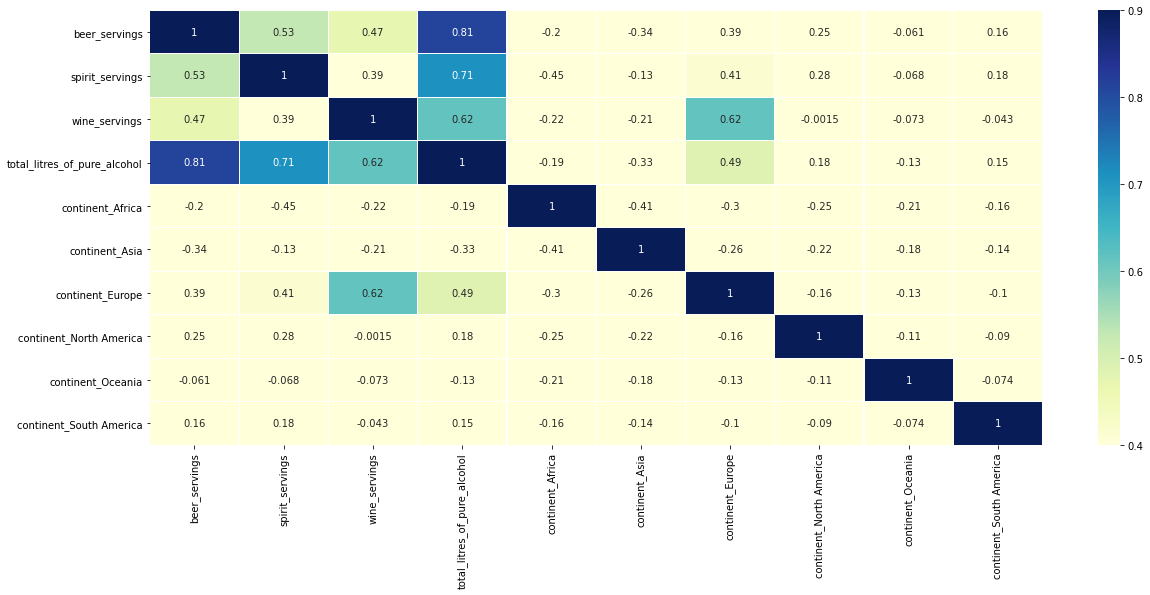

In [63]:
corrmatrix = a.corr()
plt.subplots(figsize=(20,8))
sns.heatmap(corrmatrix,vmin=0.4, vmax=0.9, annot=True, linewidths=0.2, cmap='YlGnBu')

In [64]:
a.columns

Index(['beer_servings', 'spirit_servings', 'wine_servings',
       'total_litres_of_pure_alcohol', 'continent_Africa', 'continent_Asia',
       'continent_Europe', 'continent_North America', 'continent_Oceania',
       'continent_South America'],
      dtype='object')

In [65]:
a.drop(['wine_servings','spirit_servings'],axis=1,inplace=True)

In [69]:
y=a['total_litres_of_pure_alcohol']
X=a.drop(['total_litres_of_pure_alcohol'],axis=1)

In [70]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,y,random_state=42,test_size=0.2)
from sklearn import linear_model
lr=linear_model.LinearRegression()
model=lr.fit(x_train,y_train)
prediction=model.predict(x_test)
from sklearn.metrics import mean_squared_error
print('MSE IS:', mean_squared_error(y_test,prediction))

MSE IS: 4.530292183254488


In [71]:
from sklearn.metrics import r2_score
print('R squared value is :', r2_score(y_test,prediction))

R squared value is : 0.6774376327216955


In [75]:
p=pd.DataFrame({"A":[3,8,9,1,6],
               "B":[2,14,5,7,9],
               "C":[13,18,5,2,10]})
                

In [76]:
q=pd.DataFrame({"A":[3,8,9,1,6],
               "D":[6,8,3,9,1],
               "E":[21,4,17,9,1]})

In [77]:
pd.merge(p,q,on='A')

,A,B,C,D,E
0,3,2,13,6,21
1,8,14,18,8,4
2,9,5,5,3,17
3,1,7,2,9,9
4,6,9,10,1,1


In [79]:
s=pd.DataFrame({"P":[13,18,19,11,16],
               "Q":[12,14,15,17,19],
               "R":[3,8,15,12,10]})

In [80]:
t=pd.DataFrame({"S":[13,18,19,11,16],
               "T":[12,14,15,17,9],
               "U":[3,18,5,12,10]})

In [81]:
z=s.join(t)
z

,P,Q,R,S,T,U
0,13,12,3,13,12,3
1,18,14,8,18,14,18
2,19,15,15,19,15,5
3,11,17,12,11,17,12
4,16,19,10,16,9,10


In [82]:
u=pd.DataFrame({"L":[1,2,3,4,5],
               "M":[6,7,8,9,10],
               "N":[11,12,13,14,15]})

In [83]:
c=pd.concat([t,u],axis=1)
c

,S,T,U,L,M,N
0,13,12,3,1,6,11
1,18,14,18,2,7,12
2,19,15,5,3,8,13
3,11,17,12,4,9,14
4,16,9,10,5,10,15
